<a href="https://colab.research.google.com/github/nambiar/MachineLearning/blob/master/Phase2/Session1/P2_Session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import tensorflow as tf
import vis ## keras-vis
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.




1.   Vectorizing text is the process of transforming text into numeric tensors. 
2.   Segment text into words, and transform each word into a vector
3.   Collectively, the different units into which you can break down text (words) are called tokens, and breaking text into such tokens is called tokenization.
4.All text-vectorization processes consist of applying some tokenization scheme and then associating numeric vectors with the generated tokens.
5.These vectors, packed into sequence tensors, are fed into DNN
6. Token embedding used for words, also called word embedding
7.



In [3]:
#Word level one shot encoding: Converting word excluding "." into one shot vector
samples = ['The cat sat on the mat.', 'The dog ate my homework.'] #An example sentence
token_index = {} #A dict for storing words and corresponding one shot vectors
for sample in samples:
  for word in sample.split():#.split the sentence into words
    #print (word), also . is part of word
    if word not in token_index:
      token_index[word] = len(token_index) + 1
#print(max(token_index.values())) 10 unique values

max_length = 10
#create a zero vector of (2,10,11)
results = np.zeros(shape=(len(samples),max_length,max(token_index.values()) + 1))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.0#getting a one hot encoded vector for each value of word

print(results[1,:,:])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [4]:

l1 = ["eat","sleep","repeat"] 
  
# printing the tuples in object directly 
for ele in enumerate(l1): 
    print (ele) 

(0, 'eat')
(1, 'sleep')
(2, 'repeat')


In [5]:
#Character to one hot encoding
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable#prints all the available ascii chars
#print(characters)
#first making a zip starting from 0 for all ascii values
token_index = dict(zip(range(1, len(characters) + 1), characters))
max_length = 50
print(len(samples))
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1.0
#print(results[1,:,:])    

2


In [8]:
#making the keras do the work with tokenisr
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)# Out of lib only 1000 common words
tokenizer.fit_on_texts(samples)#Build on the sentence provided
sequences = tokenizer.texts_to_sequences(samples)#convert to list for detecting duplicates
#print(sequences)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')#one hot encoding
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [13]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality
    print(index)
    results[i, j, index] = 1.0
print(results[:,:,67])# hash table generic 

67
692
314
835
322
469
67
727
845
774
677
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
#Word Embeddings :Dense word vectors
#word embeddings are lowdimensional floating-point vectors
#embeddings are learned from data.
#pretrained word embeddings is what we generally use
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)# more dense language we increse 64 to high number, 1000 commonly used words
#Embedding layer is best understood as a dictionary that maps integer indices(which stand for specific words) to dense vectors
print(embedding_layer.dtype)
#sequences that are shorter than others should be padded with zeros, and sequences that are longer should be truncated

float32


In [21]:
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)#20 word long

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_split=0.2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 2s 91us/step - loss: 0.6704 - acc: 0.6170 - val_loss: 0.6211 - val_acc: 0.6974
Epoch 2/10
20000/20000 [==============================] - 1s 63us/step - loss: 0.5440 - 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
#drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/AI/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [23]:
!wget --no-check-certificate http://mng.bz/0tIo

--2020-03-27 14:06:02--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2020-03-27 14:06:03--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2020-03-27 14:06:03--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.109.181
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.109.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘0tIo’

0tIo                100%[===================>]  57.90M  71.9MB/s    in 0.8s    

2020-03-27 14:06:04 (71.9 MB/s) - ‘0tIo’ saved [60711700/6071170

In [34]:
!pwd
!file /content/0tIo

ERROR! Session/line number was not unique in database. History logging moved to new session 64
/content
/bin/bash: file: command not found


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [35]:
from zipfile import ZipFile
filename = "/content/0tIo"
with ZipFile(filename ,'r') as zip:
  zip.extractall()
  print ("Done")

Done


In [44]:
#Use Glove pretrained word embeddings
#one string per review labels (positive/negative) into a labels list
import os
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
    if label_type == 'neg':
      labels.append(0)
    else:
      labels.append(1)
print(labels.count(0))#12500 neg and positive reviews
#giving indices to the corresponding files and storing as list 

12500


In [95]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 8000
validation_samples = 10000 
max_words = 10000# considers the top 10k words, I need to understand the criteria of top in this case
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)#given text 
sequences = tokenizer.texts_to_sequences(texts)#text to sequence tokens to give input to the wordembedding
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)#we got them parsing the zip file only index of 0 or 1
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
print(data.shape[0])
indices = np.arange(data.shape[0])#arrange the data in ascending order
np.random.shuffle(indices)#Multi-dimensional arrays are only shuffled along the first axis:
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
print(word_index.items())

Found 87393 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)
25000
dict_items([('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6), ('br', 7), ('in', 8), ('i', 9), ('it', 10), ('this', 11), ('that', 12), ('was', 13), ('as', 14), ('movie', 15), ('with', 16), ('for', 17), ('but', 18), ('film', 19), ('on', 20), ('you', 21), ('not', 22), ('are', 23), ('his', 24), ('have', 25), ('one', 26), ('be', 27), ('he', 28), ('at', 29), ('all', 30), ('by', 31), ('an', 32), ('they', 33), ('so', 34), ('who', 35), ('from', 36), ('like', 37), ('or', 38), ('just', 39), ('if', 40), ('out', 41), ('about', 42), ('her', 43), ("it's", 44), ('has', 45), ('there', 46), ('some', 47), ('what', 48), ('good', 49), ('when', 50), ('more', 51), ('very', 52), ('up', 53), ('no', 54), ('my', 55), ('time', 56), ('even', 57), ('would', 58), ('she', 59), ('see', 60), ('their', 61), ('really', 62), ('which', 63), ('only', 64), ('story', 65), ('can', 66), ('had', 67), ('me', 68), (

In [61]:
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip

--2020-03-27 14:58:44--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-27 14:58:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-27 14:58:44--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [62]:
from zipfile import ZipFile
filename = "/content/glove.6B.zip"
with ZipFile(filename ,'r') as zip:
  zip.extractall()
  print ("Done")

Done


In [65]:
glove_dir = '/content/'
embeddings_index = {}

f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [82]:
print(type(embeddings_index))
#print(embeddings_index.keys(0))
res = list(embeddings_index.keys())[0:20] 
print(res)
print(np.shape(embeddings_index["and"]))#its a 100 dim float



<class 'dict'>
['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as']
(100,)


**Preparing the GloVe word-embeddings matrix**

In [0]:
#Note that index 0 isn’t supposed to stand for any 
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))# create a tensor (10000,100)
for word, i in word_index.items():# sequences
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

**Model**

In [90]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


**Loading pretrained word embeddings into the Embedding layer**

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

**Training and evaluation**

In [96]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 5s 586us/step - loss: 0.5955 - acc: 0.6673 - val_loss: 0.4101 - val_acc: 0.8099
Epoch 2/10
8000/8000 [==============================] - 4s 540us/step - loss: 0.1273 - acc: 0.9603 - val_loss: 0.4584 - val_acc: 0.8025
Epoch 3/10
8000/8000 [==============================] - 4s 546us/step - loss: 0.0083 - acc: 0.9984 - val_loss: 0.5708 - val_acc: 0.8124
Epoch 4/10
8000/8000 [==============================] - 4s 543us/step - loss: 0.0015 - acc: 0.9998 - val_loss: 0.6835 - val_acc: 0.8091
Epoch 5/10
8000/8000 [==============================] - 4s 546us/step - loss: 4.2660e-05 - acc: 1.0000 - val_loss: 0.7857 - val_acc: 0.8115
Epoch 6/10
8000/8000 [==============================] - 4s 551us/step - loss: 2.9054e-06 - acc: 1.0000 - val_loss: 0.8843 - val_acc: 0.8126
Epoch 7/10
8000/8000 [==============================] - 4s 557us/step - loss: 1.3131e-07 - acc: 1.0000 - val_loss: 0.9233 - val

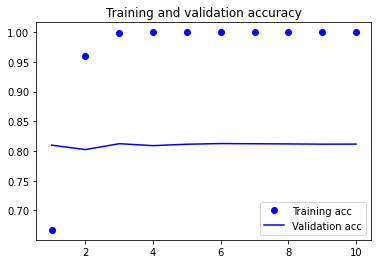

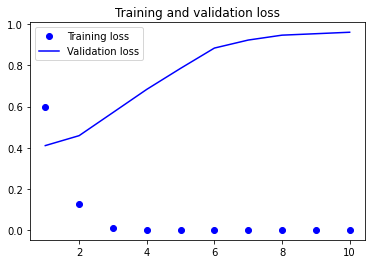

In [97]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Tokenizing the data of the test set**

In [0]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)      

In [99]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)#49% accuracy

25000/25000 [==============================] - 1s 47us/step


[0.6482078644940257, 0.87304]